Ranked list of stations:

- Filter: neighborhoods with most traffic (from Andrew's code)
- Then rank by tech neighborhoods, then highest income

Time to spend at each station:

- Analyze hours for the stations chosen

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_pickle('data_clean.pkl')

In [4]:
df.columns

Index(['TURNSTILE', 'STATION', 'year', 'hour', 'WD vs WE', 'ENTRIES', 'EXITS',
       'Entries Delta', 'Exits Delta', 'Cum. Entries & Exits',
       'turnstile_hour_key', 'Mean Entries & Exits'],
      dtype='object')

In [32]:
df.groupby(['STATION','year','hour'],as_index=False)['Cum. Entries & Exits'].mean()

,STATION,year,hour,Cum. Entries & Exits
0,1 AV,2016,9,0.000000
1,1 AV,2016,10,162.900000
2,1 AV,2016,11,4348.950000
3,1 AV,2016,12,0.000000
4,1 AV,2016,15,5400.325000
5,1 AV,2016,16,0.000000
6,1 AV,2016,19,5324.325000
7,1 AV,2017,9,0.000000
8,1 AV,2017,10,107.400000
9,1 AV,2017,11,4365.900000


In [23]:
df['STATION']

12        WHITEHALL S-FRY
13        WHITEHALL S-FRY
14        WHITEHALL S-FRY
15        WHITEHALL S-FRY
16        WHITEHALL S-FRY
17        WHITEHALL S-FRY
18        WHITEHALL S-FRY
19        WHITEHALL S-FRY
20        WHITEHALL S-FRY
21        WHITEHALL S-FRY
22        WHITEHALL S-FRY
38        WHITEHALL S-FRY
39        WHITEHALL S-FRY
40        WHITEHALL S-FRY
41        WHITEHALL S-FRY
42        WHITEHALL S-FRY
43        WHITEHALL S-FRY
44        WHITEHALL S-FRY
45        WHITEHALL S-FRY
46        WHITEHALL S-FRY
47        WHITEHALL S-FRY
48        WHITEHALL S-FRY
49        WHITEHALL S-FRY
50        WHITEHALL S-FRY
66        WHITEHALL S-FRY
67        WHITEHALL S-FRY
68        WHITEHALL S-FRY
69        WHITEHALL S-FRY
70        WHITEHALL S-FRY
71        WHITEHALL S-FRY
               ...       
503274        96 ST-2 AVE
503275        96 ST-2 AVE
503276        96 ST-2 AVE
503277        96 ST-2 AVE
503278        96 ST-2 AVE
503279        96 ST-2 AVE
503280        96 ST-2 AVE
503281      

In [5]:
df.head()

,TURNSTILE,STATION,year,hour,WD vs WE,ENTRIES,EXITS,Entries Delta,Exits Delta,Cum. Entries & Exits,turnstile_hour_key,Mean Entries & Exits
12,R001|00-00-00,WHITEHALL S-FRY,2016,9,WD,1770158,1646411,NaN,NaN,0.0,R001|00-00-00|9,0.0
13,R001|00-00-00,WHITEHALL S-FRY,2016,9,WE,1766071,1643891,NaN,NaN,0.0,R001|00-00-00|9,0.0
14,R001|00-00-00,WHITEHALL S-FRY,2016,10,WD,1753135,1638461,NaN,NaN,0.0,R001|00-00-00|10,0.0
15,R001|00-00-00,WHITEHALL S-FRY,2016,12,WD,1708728,1618761,NaN,NaN,3419.0,R001|00-00-00|12,3419.0
16,R001|00-00-00,WHITEHALL S-FRY,2016,12,WE,1709364,1619106,636.0,345.0,981.0,R001|00-00-00|12,3419.0


Data related to incomes

In [7]:
zipcode_df = pd.read_csv('Data/sub-borougharea-medianhouseholdincome2018.csv')

In [17]:
zipcode_df.groupby('Sub-Borough Area',as_index=False)['2017','2016'].mean().shape

(55, 3)

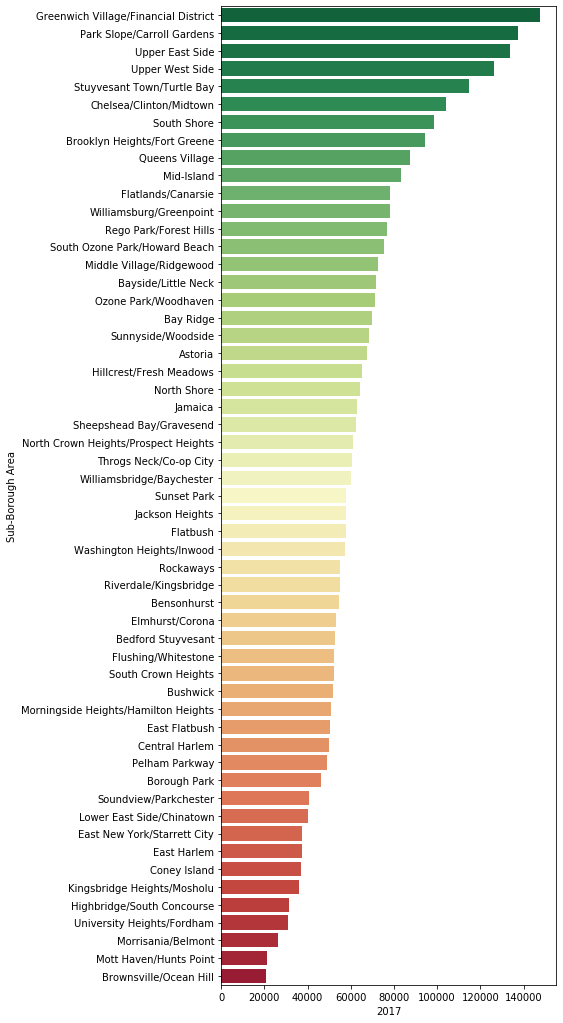

In [30]:
plt.figure(figsize=(6,18))

sns.barplot(y='Sub-Borough Area', x='2017', 
            data=zipcode_df.sort_values('2017',ascending=False),
            palette = sns.color_palette("RdYlGn_r", len(zipcode_df)));